In [311]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#!pip install geopandas
import geopandas as gpd

import sys
sys.path.append('../cambridgegis_data_trans')
sys.path.append('../')
import geopandas_osm.osm
from intersections_and_roads import *
%matplotlib inline

## Section 1 - Useful import stuff - getting and viewing the graph

In [273]:
land_use_data = pd.read_csv('2016_Land_Use_Data.csv')
crime_reports = pd.read_csv('Crime_Reports.csv')
peak_hour_traffic = pd.read_csv('Map_of_Average_Daily_and_Peak_hour_Traffic_Counts_1972_to_2014.csv')
police_dept_crash_data = pd.read_csv('Police_Department_Crash_Data_-_Historical.csv')
pothole_repair = pd.read_csv('Pothole_Repair_Requests.csv')
bike_facilities = pd.read_csv('RECREATION_BikeFacilities.csv')

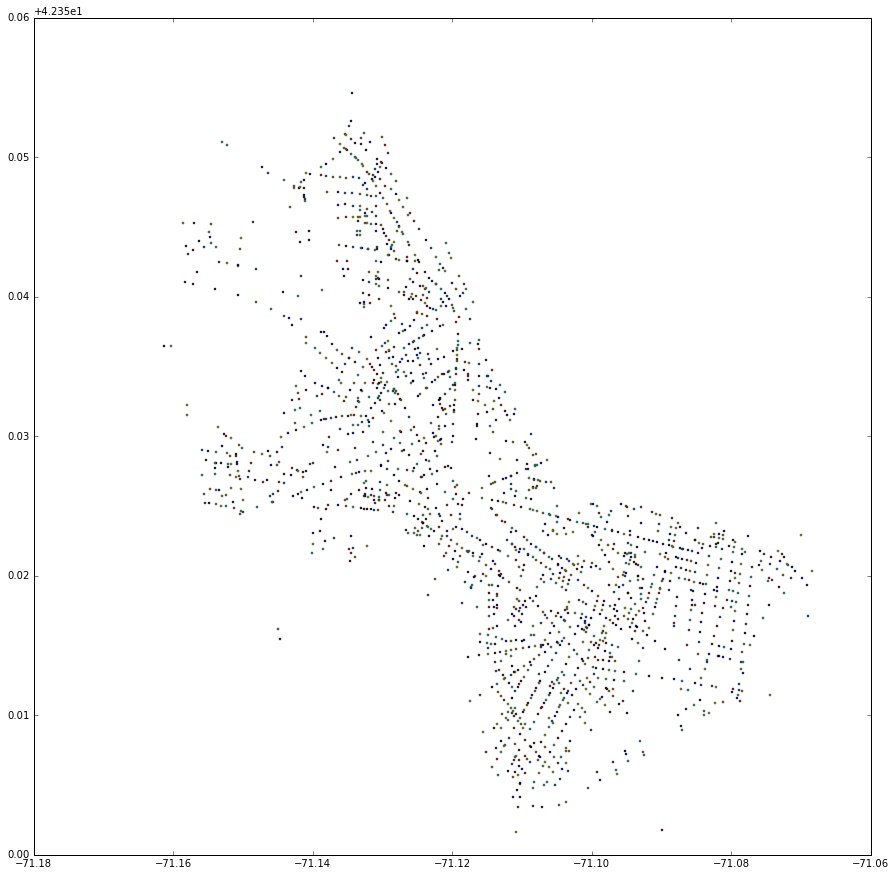

In [274]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
intersections = gpd.read_file('../cambridgegis_data_trans/Intersections/TRANS_Intersections.topojson')
intersections.plot(ax=ax)

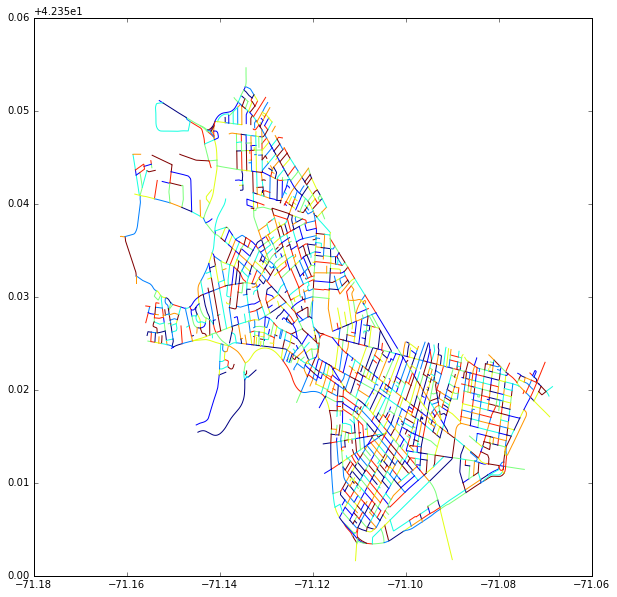

In [275]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
street_centerline = gpd.read_file('../cambridgegis_data_trans/Street_Centerlines/TRANS_Centerlines.topojson')
street_centerline.plot(ax=ax)

In [277]:
street_centerline.head(2)

,Alias,Direction,EditDate,FromNode,GlobalID,L_From,L_To,Label,MajorRoad,Potentail_Range_Done,...,Restriction,Street,Street_ID,Street_Name,Street_Type,ToNode,ZIP_Left,ZIP_Right,geometry,id
0,None,1,None,1402,{A7A84D21-13BE-4452-8FED-0A70D873AA23},-1,-1,Berkshire St,NaN,NaN,...,F,Berkshire St,81,Berkshire,St,1352,02141,02141,LINESTRING (-71.09068247905431 42.370666254489...,Berkshi_St_6
1,None,0,None,775,{4CEE4AD2-F2B1-4B17-8DD8-656C51436B84},12,20,Berkeley St,NaN,NaN,...,F,Berkeley St,79,Berkeley,St,750,02138,02138,LINESTRING (-71.12509640303233 42.378050036360...,Berkele_St_3


In [278]:
intersections.head(2)

,EditDate,GlobalID,IntersectingStreetCount,Intersection,NodeNumber,P_X,P_Y,geometry,id
0,None,{D1E59B72-36DC-4E6B-9950-B9260BAA807C},2,Cardinal Medeiros Ave & James Way,1381,767108.65,2960261.64,POINT (-71.08945606491686 42.37037471967096),1174
1,None,{D18D1979-4869-4E5A-9D14-DC74ECDB7CBB},NaN,None,118,755424.60,2969559.46,POINT (-71.13254779801892 42.39603508437763),131


In [312]:
intersection_graph = build_intersection_graph(intersections=intersections, street_centerline=street_centerline)

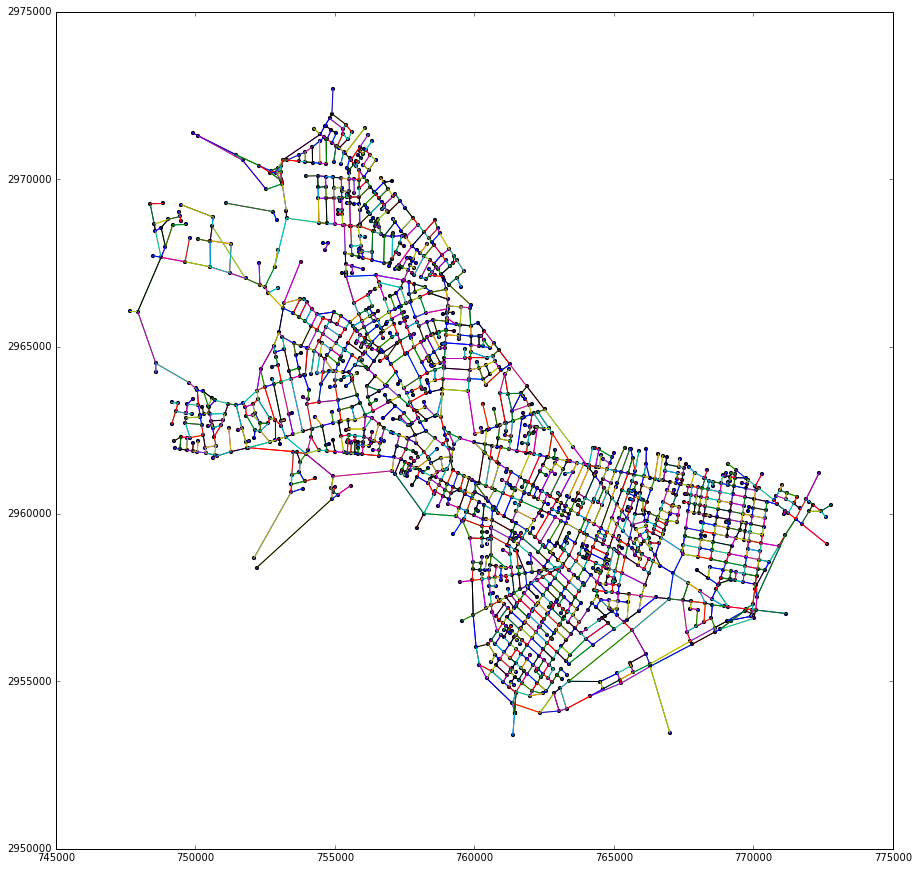

In [313]:
fig, ax = plt.subplots(1,1, figsize=(15, 15))

xs = [intersection_graph[key].get_x_y()[0] for key in intersection_graph]
ys = [intersection_graph[key].get_x_y()[1] for key in intersection_graph]

for key in intersection_graph:
    node = intersection_graph[key]
    for connection in node.get_connections():
        child = intersection_graph[connection]
        line_x = [node.get_x_y()[0], child.get_x_y()[0]]
        line_y = [node.get_x_y()[1], child.get_x_y()[1]]
        ax.plot(line_x, line_y)

ax.scatter(xs, ys, s=10)
plt.show()

In [298]:
pothole_repair.head(2)

,Request ID,Status,Action Type,Date Submitted,Date Completed,Address,Platform,Submitted By
0,REQ491298,Closed,Repair Pothole in Street,06/18/2014 12:00:00 AM,06/24/2014 12:00:00 AM,"237 Pearl St\nCambridge, MA\n(42.3588918560004...",NaN,kpark
1,REQ410799,Closed,Repair Pothole in Street,06/07/2012 12:00:00 AM,06/12/2012 12:00:00 AM,"104 Mt Auburn St\nCambridge, MA\n(42.372832162...",NaN,web-services


In [299]:
police_dept_crash_data.head(2)

,Crash Number,Date Time,Day Of Week,Object 1,Object 2,Street Number,Steet Name,Cross Street,Location,Latitude,Longitude,Coordinates
0,24029,04/10/2010 09:39:00 AM,Saturday,Auto,Fixed Object,NaN,NaN,NaN,"& Cambridge, MA",NaN,NaN,NaN
1,24555,08/02/2010 11:55:00 PM,Monday,Auto,Auto,NaN,OXFORD AVE,NaN,"OXFORD AVE & Cambridge, MA",NaN,NaN,NaN


In [300]:
land_use_data.head(2)

,Location,Map-Lot,Map,Lot,Land Area,Land Use Code,Land Use Category,Land Use Description,Mixed Use,Existing Units,Group Quarters,Grad Student Housing,Condo,Tax Status,Location 1
0,29 ALEWIFE BROOK PKWY,185-42,185,42,5323,104,Residential,TWO-FAM-RES,,2,,,,,"(42.402304780599898, -71.134265010899895)"
1,70 MATIGNON RD,185-48,185,48,4254,104,Residential,TWO-FAM-RES,,2,,,,,"(42.402275861, -71.133773709099898)"


In [301]:
peak_hour_traffic.head(2)

,ID,PrimaryStreet,LocationDescription,Location,Source,1972,1981,1987,1989,1994,...,PMPeak2005,PMPeak2006,PMPeak2007,PMPeak2008,PMPeak2009,PMPeak2010,PMPeak2011,PMPeak2012,PMPeak2013,PMPeak2014
0,1,Massachusetts Avenue,South of Upland Road,"(42.3879544330999, -71.119331699400007)","Cordon Counts, Transportation Data Corporation",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN
1,2,Upland Road,West of Massachusetts Avenue,"(42.387467527399899, -71.120659863200004)","Cordon Counts, Accurate Counts 5/14/99",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN


In [302]:
crime_reports.head(2)

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"


## Section 2 - Other stuff that may become useful

Useful blog: https://michelleful.github.io/code-blog/2015/04/27/osm-data/
Download this and place it into 'geolocation_data' folder (unzip) https://s3.amazonaws.com/metro-extracts.mapzen.com/boston_massachusetts.imposm-geojson.zip

In [ ]:
# We'd need the geolocation data again
admin_df = gpd.read_file('geolocation_data/boston_massachusetts_admin.geojson')

# # Inspecting the file we want just the first row
sg_boundary = admin_df[admin_df.name == 'Cambridge'].iloc[0].geometry

sg_boundary

In [60]:
roads.head(5)

,highway,name,geometry
0,residential,Columbia Street,"LINESTRING (-71.093746 42.374253, -71.09386000..."
1,trunk,Monsignor O'Brien Highway,"LINESTRING (-71.0755329 42.3705222, -71.075928..."
2,secondary,Warren Street,"LINESTRING (-71.087917 42.373499, -71.08791100..."
3,residential,Chester Street,"LINESTRING (-71.12437199999999 42.393652, -71...."
4,service,NaN,"LINESTRING (-71.0864613 42.3730531, -71.085802..."


In [4]:
df = gpd.read_file('geolocation_data/boston_massachusetts_roads.geojson')
df.shape

(36349, 13)

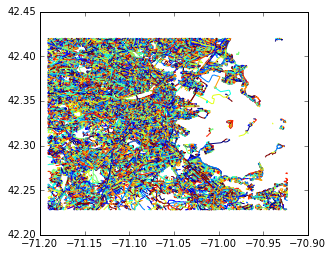

In [5]:
df.plot()

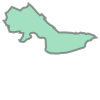

In [6]:
admin_df = gpd.read_file('geolocation_data/boston_massachusetts_admin.geojson')

# # Inspecting the file we want just the first row
sg_boundary = admin_df[admin_df.name == 'Cambridge'].iloc[0].geometry

sg_boundary 

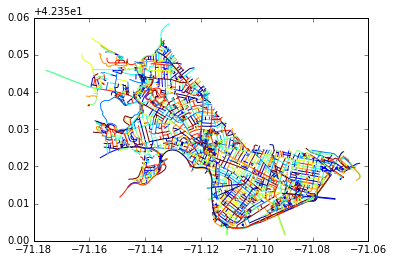

In [52]:
# Query for the highways within the `sg_boundary` we obtained earlier from the sg_admin.
# NB this does take on the order of minutes to run
roads = geopandas_osm.osm.query_osm('way', sg_boundary, recurse='down', tags='highway')

# This gives us lots of columns we don't need, so we'll isolate it to the ones we do need
roads = df[df.type == 'LineString'][['highway', 'name', 'geometry']]

fig, ax = plt.subplots(1,1)
roads.plot(ax = ax)